In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [63]:
import numpy as np
import pandas as pd

from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor # Stacking Regressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [136]:
data = pd.read_csv('gdrive/My Drive/iProfi AI/Part 2/1/Train.csv')
data.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.00,1.00,...,0,0,0,0,0,0,0,0,0,4510000
1,4,2011-1,232,0.00,3,60,3,0,25.00,NaN,...,0,0,0,0,0,0,0,0,0,3335000
2,5,2011-1,453,1.00,5,52,2,0,30.00,1.00,...,0,0,0,0,0,0,0,0,0,3612000
3,6,2011-1,44,NaN,1,33,1,0,30.00,1.00,...,0,0,0,0,0,0,0,0,0,559000
4,7,2011-1,74,2.00,16,44,1,2,20.00,0.00,...,0,0,0,0,0,0,0,0,0,4080000


In [137]:
test_data = pd.read_csv('gdrive/My Drive/iProfi AI/Part 2/1/Test.csv')
test_data.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,3546,2011-1,566,1.00,5,52,2,1,25.00,NaN,...,0,0,0,0,0,0,0,0,0,0
1,27171,2011-2,416,0.00,3,58,3,0,5.00,1.00,...,0,0,0,0,0,0,0,0,0,0
2,3329,2011-1,62,NaN,1,41,2,0,25.00,1.00,...,0,0,0,0,0,0,0,0,0,0
3,46156,2011-6,560,1.00,9,60,3,1,30.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,27435,2011-2,465,NaN,3,72,2,1,NaN,0.00,...,0,0,0,0,0,0,1,0,0,0


In [138]:
data.drop(['id'], axis=1, inplace=True)

test_id = test_data['id']
test_data.drop(['id'], axis=1, inplace=True)

In [139]:
data.drop(['date'], axis=1, inplace=True)
test_data.drop(['date'], axis=1, inplace=True)

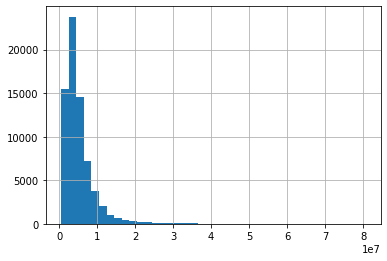

In [140]:
data['price'].hist(bins = 40)

In [141]:
# data['price'] = np.log1p(data['price'])

# Don't forget to exp1 them at the end!

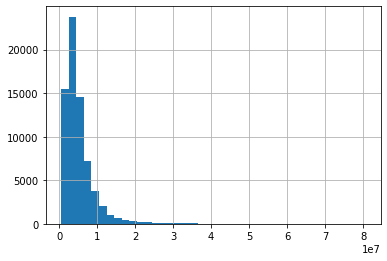

In [142]:
data['price'].hist(bins = 40)

In [143]:
# data = data[data['rooms'] < 5]

In [144]:
y = data['price']

data.drop(['price'], axis=1, inplace=True)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   street_id   70000 non-null  int64  
 1   build_tech  49121 non-null  float64
 2   floor       70000 non-null  int64  
 3   area        70000 non-null  int64  
 4   rooms       70000 non-null  int64  
 5   balcon      70000 non-null  int64  
 6   metro_dist  66550 non-null  float64
 7   g_lift      48924 non-null  float64
 8   n_photos    70000 non-null  int64  
 9   kw1         70000 non-null  int64  
 10  kw2         70000 non-null  int64  
 11  kw3         70000 non-null  int64  
 12  kw4         70000 non-null  int64  
 13  kw5         70000 non-null  int64  
 14  kw6         70000 non-null  int64  
 15  kw7         70000 non-null  int64  
 16  kw8         70000 non-null  int64  
 17  kw9         70000 non-null  int64  
 18  kw10        70000 non-null  int64  
 19  kw11        70000 non-nul

In [146]:
missed_data_cols = ['build_tech', 'metro_dist', 'g_lift']

data['build_tech'].fillna(0, inplace=True)

data['metro_dist'].fillna(25.0, inplace=True)

data['g_lift'].fillna(0, inplace=True)

In [147]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   street_id   30000 non-null  int64  
 1   build_tech  21144 non-null  float64
 2   floor       30000 non-null  int64  
 3   area        30000 non-null  int64  
 4   rooms       30000 non-null  int64  
 5   balcon      30000 non-null  int64  
 6   metro_dist  28554 non-null  float64
 7   g_lift      21084 non-null  float64
 8   n_photos    30000 non-null  int64  
 9   kw1         30000 non-null  int64  
 10  kw2         30000 non-null  int64  
 11  kw3         30000 non-null  int64  
 12  kw4         30000 non-null  int64  
 13  kw5         30000 non-null  int64  
 14  kw6         30000 non-null  int64  
 15  kw7         30000 non-null  int64  
 16  kw8         30000 non-null  int64  
 17  kw9         30000 non-null  int64  
 18  kw10        30000 non-null  int64  
 19  kw11        30000 non-nul

In [148]:
missed_test_data_cols = ['build_tech', 'metro_dist', 'g_lift']

test_data['build_tech'].fillna(0, inplace=True)

test_data['metro_dist'].fillna(25.0, inplace=True)

test_data['g_lift'].fillna(0, inplace=True)

In [149]:
data.describe()

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,...,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00
mean,334.28,0.37,5.27,52.24,2.12,0.40,22.30,0.35,2.47,0.06,...,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00
std,194.15,0.54,3.90,17.78,0.83,0.55,8.09,0.48,1.94,0.23,...,0.08,0.06,0.04,0.03,0.09,0.09,0.05,0.02,0.03,0.01
min,0.00,0.00,1.00,29.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,166.00,0.00,2.00,40.00,1.00,0.00,15.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,334.00,0.00,4.00,52.00,2.00,0.00,25.00,0.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,502.00,1.00,7.00,60.00,3.00,1.00,30.00,1.00,4.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,671.00,2.00,25.00,217.00,6.00,2.00,30.00,1.00,11.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [150]:
X = data.to_numpy()

In [151]:
y = y.to_numpy()

In [152]:
test_X = test_data.to_numpy()

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [165]:
# Baseline model fitting

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [166]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)                             

In [167]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [168]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [169]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [170]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
[11:24:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:30:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:31:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
elasticnet
Lasso
Ridge
Svr
GradientBoosting
xgboost
[11:52:41] WARNING: /workspace/src/obje

In [246]:
def blend_models_predict(X):
    '''
    return ((0.05 * elastic_model_full_data.predict(X)) + \
            (0.00 * lasso_model_full_data.predict(X)) + \
            (0.05 * ridge_model_full_data.predict(X)) + \
            (0.05 * svr_model_full_data.predict(X)) + \
            (0.15 * gbr_model_full_data.predict(X)) + \
            (0.2 * xgb_model_full_data.predict(X)) + \
            (0.15 * lgb_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))
    '''
    return stack_gen_model.predict(np.array(X))

In [247]:
test_price = blend_models_predict(test_X)

In [156]:
# test_price = np.expm1(ridge.predict(test_X))

# test_price = ridge.predict(test_X)

In [248]:
test_price_df = pd.Series(test_price)

In [249]:
test_price_df

0        4484607.50
1        3369196.25
2        1809947.75
3        6844333.00
4       11258242.00
            ...    
29995    3087786.50
29996    2164123.25
29997    5878904.50
29998    5602260.50
29999    2107250.75
Length: 30000, dtype: float32

In [250]:
submission = pd.concat([test_id, test_price_df], axis=1)

In [251]:
submission

,id,0
0,3546,4484607.50
1,27171,3369196.25
2,3329,1809947.75
3,46156,6844333.00
4,27435,11258242.00
...,...,...
29995,58374,3087786.50
29996,53540,2164123.25
29997,63164,5878904.50
29998,18922,5602260.50


In [252]:
submission.rename(columns={0: 'price'}, inplace=True)

In [253]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
submission

,id,price
0,3546,4484607.50
1,27171,3369196.25
2,3329,1809947.75
3,46156,6844333.00
4,27435,11258242.00
...,...,...
29995,58374,3087786.50
29996,53540,2164123.25
29997,63164,5878904.50
29998,18922,5602260.50


In [254]:
submission.to_csv('gdrive/My Drive/iProfi AI/Part 2/1/submission.csv', index=False)